In [4]:
fileName='card.csv'
if fileName!='card.csv':
    print('파일없음')

In [3]:
import os
from glob import glob

#os.listdir(' . ')# 경로없이
#glob('*') #경로없이
#glob('./*') #경로포함: 예) img/a.jpg가 있다면 glob('./img/*') ==> \\img\\a.jpg

findFile='card.csv'

for i in os.listdir('.'):
    if i==findFile:
        print(findFile, '있음')
        break
    

card.csv 있음


### [파일열기전에 파일존재여부 확인]
-파일이있는 경로에 내가 사용하고자 하는 파일명이 있는가를 체크
 -경로내의 파일리스트를 가져와야함:     fileList=os.listdir(' . ')
 -갖온 리스트에 검색하는 파일명이 있는가:     fileList.index=('card.csv')
  -인덱스 명령은 위치값을 가져옴(0,1,2,3...)
  -같은자료가 없으면 그 어떤 값도 가져오질못해서 오류
   -try,except로 해결

In [4]:
fileList=os.listdir('.')
try: #실행
    fileList.index('card.csv')
    print('파일있음')
except: #예외시 실행
 print('파일없음')

파일있음


In [5]:
def findData(findFile):
    import os
    from glob import glob

    #os.listdir(' . ')# 경로없이
    #glob('*') #경로없이
    #glob('./*') #경로포함: 예) img/a.jpg가 있다면 glob('./img/*') ==> \\img\\a.jpg

    findFile='card.csv'

    for i in os.listdir('.'):
        if i==findFile:
            print(findFile, '있음')
            break
        

In [6]:
import csv
try:
    f=open(findFile)
    data=csv.reader(f)
    next(data)
    data=list(data)
    print(data[0])
except:
    print('작업안함')

['2019-10-12 9:13', '1972753', '본', 'S&', '185', '네이버파이낸셜(주)', '546800', '일시불(A)', '부분취소']


In [7]:
#next(data) #data의 첫번째 자료를 지나가자, 이 작업이 없으면 리스트로 변환하고 0번자료를 제외해야함
import csv
f=open('card.csv')
data = csv.reader(f) 
title=list(data)[0]
title

['\ufeff이용일시', '승인번호', '본인구분', '브랜드', '이용카드', '가맹점명', '이용금액', '이용구분', '매입상태']

In [8]:
f=open('card.csv')
data = csv.reader(f) 
data=list(data)[1:]
data[:3] #샘플

[['2019-10-12 9:13',
  '1972753',
  '본',
  'S&',
  '185',
  '네이버파이낸셜(주)',
  '546800',
  '일시불(A)',
  '부분취소'],
 ['2019-10-12 11:56',
  '3399357',
  '본',
  'S&',
  '185',
  'GS  샵',
  '60440',
  '일시불(A)',
  '전표매입'],
 ['2019-10-13 9:16',
  '12621902',
  '본',
  'S&',
  '185',
  'G마켓',
  '91520',
  'P(A)',
  '전표매입']]

In [9]:
next(data) #파일헤더 건너뛰기
#파일 리스트로바꾸기
data=list(data)
print(data[0])

TypeError: 'list' object is not an iterator

In [10]:
#row는 한줄씩 읽어냄
이용금액=[]
for row in data:
    이용금액.append(int(row[6]))
#위에 코드를 리스트 컴프리헨션로 변경
이용금액 = [int(row[6]) for row in data] #코드압축(컴프리헨션) /속도향상/ 권장

In [11]:
num=title.index('이용금액')
이용금액 = [int(row[6]) for row in data]
이용금액[:5], 이용금액[-5:] #위로, 아래로 5개 샘플보기
#print('합',sum(이용금액),'최솟값',min(이용금액),'최댓값',max(이용금액),'평균', sum(이용금액)/len(이용금액))
print('전체합{}/최소{} /최대{}/ 평균{}'.format(sum(이용금액),min(이용금액),max(이용금액),sum(이용금액)/len(이용금액)))


전체합11419825/최소100 /최대546800/ 평균48389.088983050846


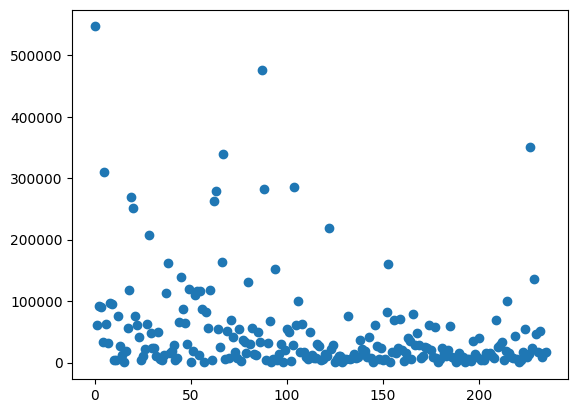

In [12]:
import matplotlib.pyplot as plt
plt.plot(이용금액,'o') #산점도

In [20]:
data[0] #'2019-10-12 9:13', [0] 번 자료만 보겠다
data[:3][0],data[-3:][0] 

(['2019-10-12 9:13',
  '1972753',
  '본',
  'S&',
  '185',
  '네이버파이낸셜(주)',
  '546800',
  '일시불(A)',
  '부분취소'],
 ['2019-12-31 12:43',
  '18170026',
  '본',
  'S&',
  '185',
  '(주)현대백화점신촌점',
  '9200',
  '일시불',
  '전표매입'])

In [45]:
# 3개월간 카드사용내역
data[0][0], data[-1][0]
# 데이터 누적
spend=0
spend+=int(data[0][-3])
spend+=int(data[1][-3])
spend+=int(data[2][-3])
print(spend)
#컴프리헨션
# 3개월간 카드사용내역
start_date, end_date = data[0][0], data[-1][0]

# 데이터 누적
spend = sum(int(row[-3]) for row in data[:3])


698760


In [35]:
title

전표구분 = [row[-1] for row in data]
set(전표구분) #set은 중복제거이지만 이자료는 인덱싱 안됨

{'매출취소', '부분취소', '승인취소', '전표매입'}

In [34]:
전표구분 = [row[-1] for row in data]
전표리스트=set(전표구분)
print(전표리스트)
전표리스트[0] #Error!

{'전표매입', '매출취소', '승인취소', '부분취소'}


TypeError: 'set' object is not subscriptable

Text(0.5, 1.0, '전표매입한 이용금액')

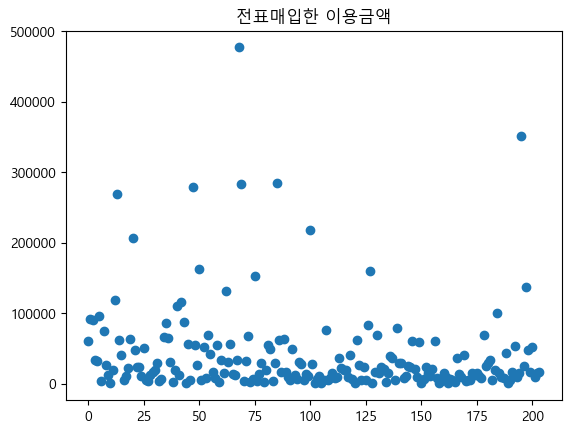

In [44]:
## 전표매입에 관련된 이용금액만
plt.rcParams['font.family'] ='Malgun Gothic'
전표매입리스트=[]
for row in data:
    if row[-1]=='전표매입':
        전표매입리스트.append(int(row[6])) #int로 변환해주어야 y축에 숫자로뜸

plt.plot(전표매입리스트,'o')
plt.title('전표매입한 이용금액') #제목달기


Text(0.5, 1.0, '전표매입리스트')

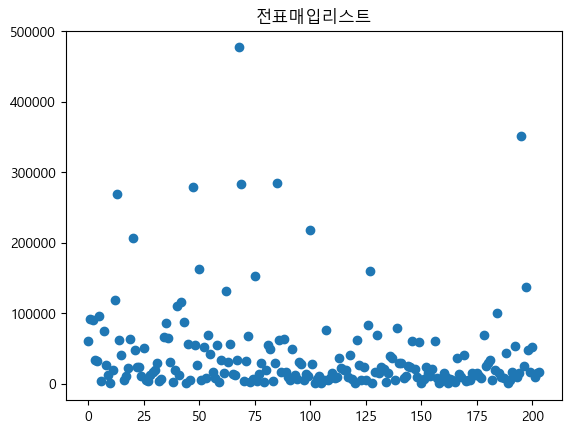

In [59]:
plt.rcParams['font.family'] ='Malgun Gothic'
전표매입리스트=[]
for row in data:
    if row[-1]=='전표매입':
        전표매입리스트.append(int(row[6]))
매출취소리스트=[]
for row in data:
    if row[-1]=='전표매입':
        매출취소리스트.append(int(row[6]))
매출승인리스트=[]
for row in data:
    if row[-1]=='전표매입':
        매출승인리스트.append(int(row[6]))

전표구분딕셔너리={'전표매입리스트':전표매입리스트,
                '매출취소이용금액':매출취소리스트,
                '승인취소 이용금액':매출승인리스트}
전표구분딕셔너리['매출취소이용금액']

자료=전표구분딕셔너리['전표매입리스트']
plt.plot(자료,'o')
plt.title('전표매입리스트') #제목달기

In [ ]:
import pandas as pd
pd.DataFrame(전표구분딕셔너리)

{'whiskers': [<matplotlib.lines.Line2D at 0x272a4d1ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x272a4d1f500>,
 'boxes': [<matplotlib.lines.Line2D at 0x272a4cf6bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x272a4d1fa40>],
 'fliers': [<matplotlib.lines.Line2D at 0x272a4d1fd40>],
 'means': []}

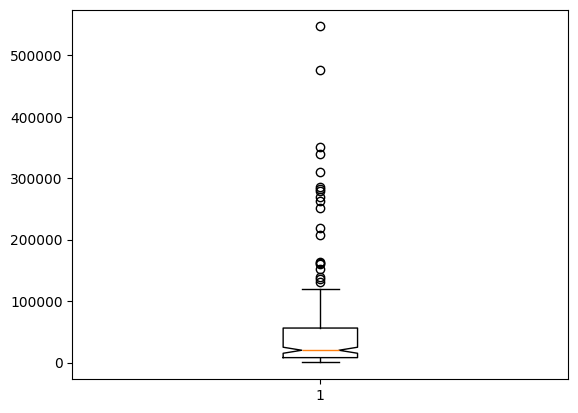

In [13]:
plt.boxplot(이용금액,'o') #boxplot

(array([173.,  36.,  14.,   2.,   3.,   4.,   2.,   0.,   1.,   1.]),
 array([1.0000e+02, 5.4770e+04, 1.0944e+05, 1.6411e+05, 2.1878e+05,
        2.7345e+05, 3.2812e+05, 3.8279e+05, 4.3746e+05, 4.9213e+05,
        5.4680e+05]),
 <BarContainer object of 10 artists>)

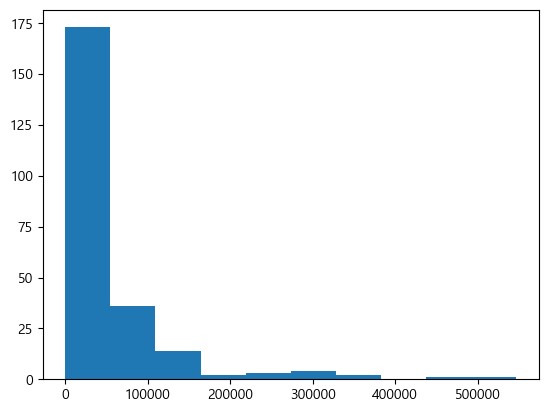

In [47]:
plt.hist(이용금액) #boxplot